# **ELEVVO PATHWAYS MACHINE LEARNING INTERNSHIP**
---
# **Task 03: Forest Cover Type Classification**
---
# **Submitted By: Muhammad Usman**

## **Install uciml repo and import other important libraries**

In [2]:
pip install ucimlrepo

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

## **Load The Dataset**

In [4]:
# Load dataset
covertype = fetch_ucirepo(id=31)
X = covertype.data.features
y = covertype.data.targets['Cover_Type']

## **Preprocessing the data**

In [5]:
# Data preprocessing
def preprocess_data(X, y):
    # Identify numerical and categorical columns
    numerical_cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                     'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                     'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                     'Horizontal_Distance_To_Fire_Points']

    # Scale numerical features
    scaler = StandardScaler()
    X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

    return X, y


## **Splitting the data**

In [6]:
# Split data
X, y = preprocess_data(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/tmp/ipython-input-5-3871348398.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


## **Function to plot confusion Matrix**

In [7]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

## **Function to plot feature Importance**

In [8]:
# Function to plot feature importance
def plot_feature_importance(model, features, title):
    importance = model.feature_importances_
    indices = np.argsort(importance)[::-1]
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(importance)), importance[indices])
    plt.xticks(range(len(importance)), [features[i] for i in indices], rotation=90)
    plt.title(title)
    plt.tight_layout()
    plt.show()

## **Training Random Forest Classifer**

In [9]:
# Random Forest Model
rf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}
rf_random = RandomizedSearchCV(rf, rf_params, n_iter=6, cv=3, n_jobs=-1, random_state=42)
rf_random.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=6, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, None],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]},
                   random_state=42)

## **Training XGBoost Model**

In [13]:
# XGBoost Model
# Transform y for XGBoost (map 1-7 to 0-6)
y_subset_xgb = y - 1
# Split data for XGBoost
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y_subset_xgb, test_size=0.2, random_state=42)
# XGBoost Model
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='mlogloss')
xgb_params = {'n_estimators': [100], 'max_depth': [3, 6], 'learning_rate': [0.1]}
xgb_random = RandomizedSearchCV(xgb_model, xgb_params, n_iter=2, cv=2, n_jobs=-1, random_state=42)
xgb_random.fit(X_train_xgb, y_train_xgb)
xgb_pred = xgb_random.predict(X_test_xgb) + 1  # Map predictions back to 1-7


In [15]:
rf_pred = rf_random.predict(X_test)

## **Radom Forest Classification report**

In [17]:
print("Random Forest Results:")
print(f"Best Parameters: {rf_random.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

Random Forest Results:
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': None}
Accuracy: 0.9550

Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.94      0.95     42557
           2       0.95      0.97      0.96     56500
           3       0.95      0.97      0.96      7121
           4       0.92      0.85      0.88       526
           5       0.94      0.77      0.85      1995
           6       0.94      0.90      0.92      3489
           7       0.97      0.95      0.96      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.95    116203



## **XGBoost Classification report**

In [19]:
print("\nXGBoost Results:")
print(f"Best Parameters: {xgb_random.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, xgb_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, xgb_pred))


XGBoost Results:
Best Parameters: {'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.1}
Accuracy: 0.8109

Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.79      0.80     42557
           2       0.81      0.86      0.84     56500
           3       0.80      0.87      0.83      7121
           4       0.86      0.81      0.83       526
           5       0.86      0.30      0.44      1995
           6       0.74      0.50      0.60      3489
           7       0.88      0.80      0.84      4015

    accuracy                           0.81    116203
   macro avg       0.82      0.70      0.74    116203
weighted avg       0.81      0.81      0.81    116203



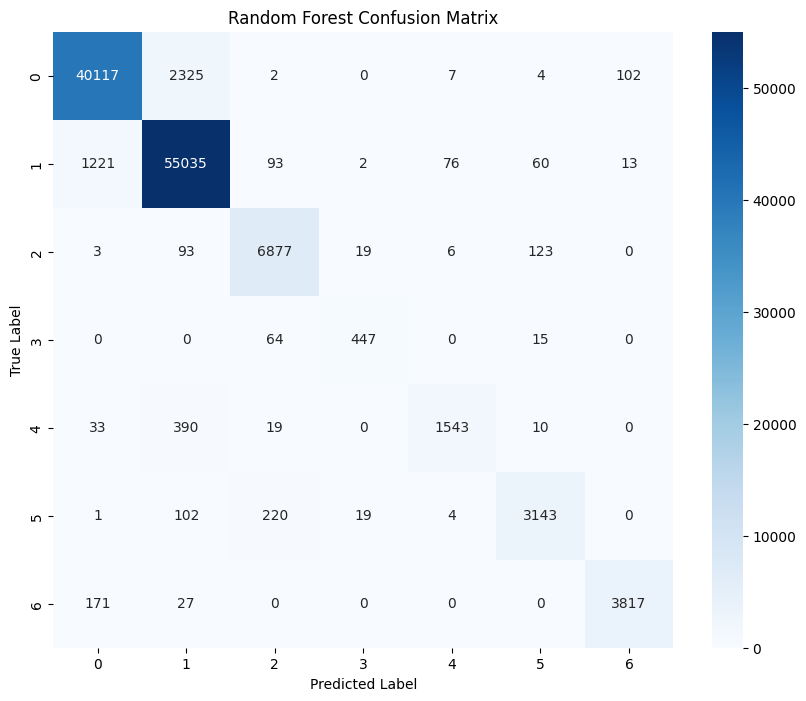

<Figure size 640x480 with 0 Axes>

In [25]:
# Visualize results
plot_confusion_matrix(y_test, rf_pred, "Random Forest Confusion Matrix")
plt.savefig("rf_confusion_matrix.png")

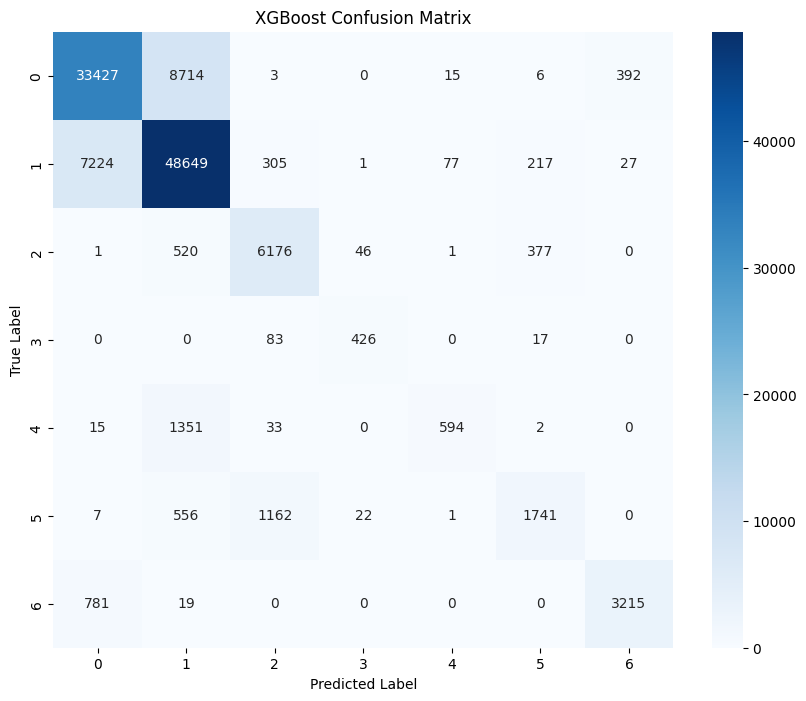

<Figure size 640x480 with 0 Axes>

In [26]:
plot_confusion_matrix(y_test, xgb_pred, "XGBoost Confusion Matrix")
plt.savefig("xgb_confusion_matrix.png")

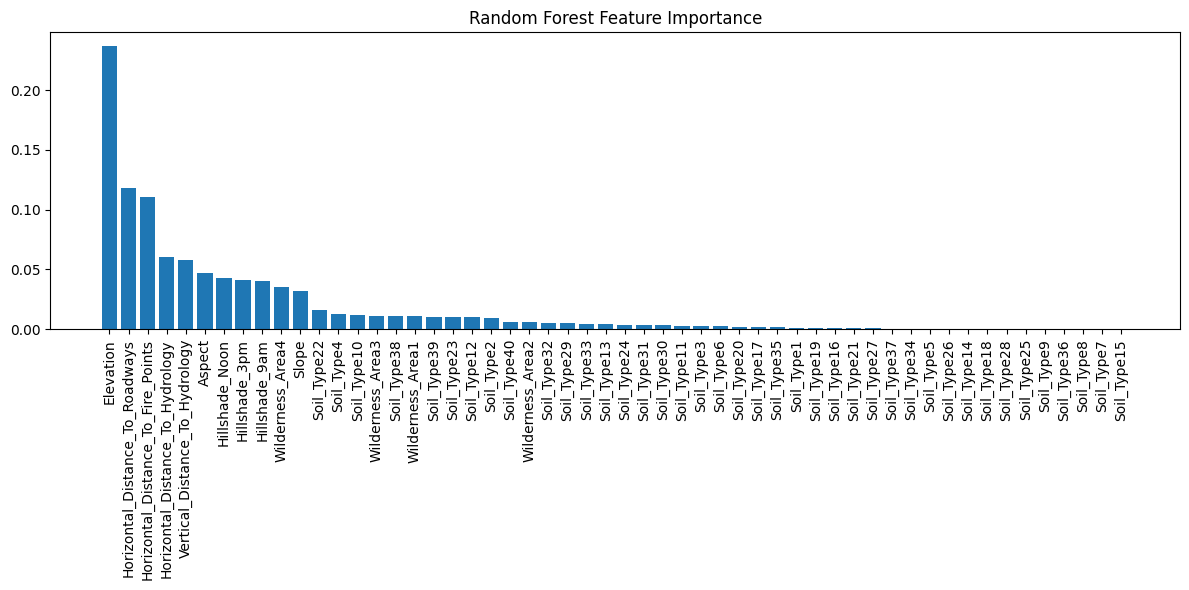

<Figure size 640x480 with 0 Axes>

In [27]:
plot_feature_importance(rf_random.best_estimator_, X.columns, "Random Forest Feature Importance")
plt.savefig("rf_feature_importance.png")

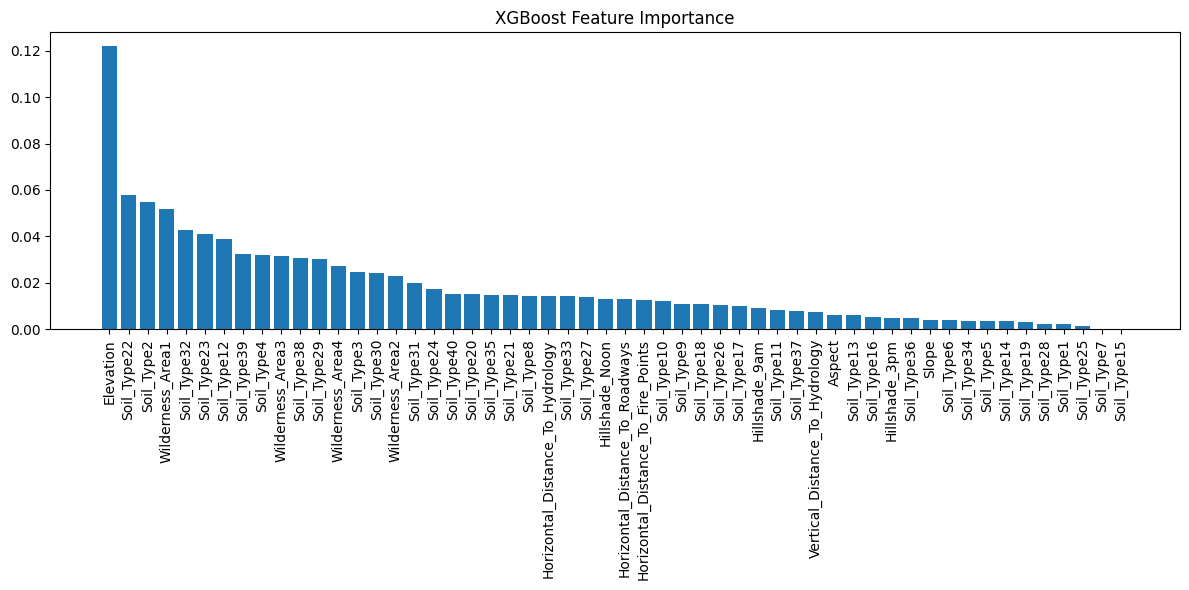

<Figure size 640x480 with 0 Axes>

In [28]:
plot_feature_importance(xgb_random.best_estimator_, X.columns, "XGBoost Feature Importance")
plt.savefig("xgb_feature_importance.png")